In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Streaming output truncated to the last 5000 lines.
2.9035882316395716
2.9063838232055
3.1269428171490685
3.487304673448436
3.4383033556296407
3.849664449832177
3.2266911350512633
2.9908432654144836
3.1914188821775027
3.311977377696942
3.573036896803861
3.780423466543789
3.234440822719749
2.918699216724254
2.883551089878842
2.88573610344395
3.0825972004158317
3.4613210336109947
3.4809426871682545
4.091710432110556
3.341334647244847
2.9435678323860563
2.90386040456067
2.924980245428667
3.2708516497098987
3.7629734750520667
3.308837917487495
3.3108441395670822
3.5493659227497667
3.5903007555568736
3.3466599436191116
2.9542235336020504
2.8788371363214202
2.8495071387345723
2.8603073074137915
2.9696279638228766
3.727389550175626
5.343032808712377
3.4080635675850086
2.9430403843197843
2.885210961885326
2.875062368788385
2.912556066738287
3.3085426012066184
3.986697274842035
3.4401598631779686
3.2907545675190404
3.4784973852905896
3.21441481747454
3.261986921811841
2.98456591672591
3.00664293

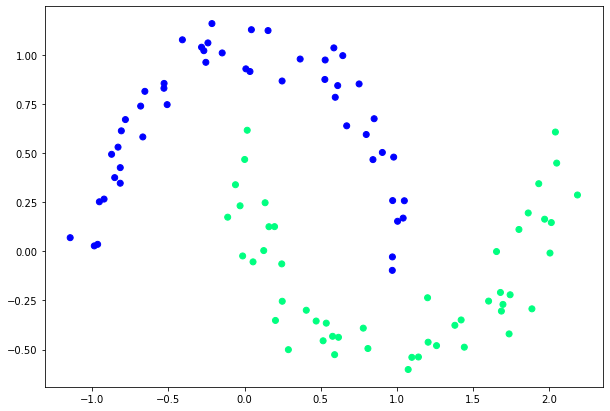

In [5]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np


features, labels = datasets.make_moons(100, noise = 0.1)
plt.figure(figsize = (10,7))
plt.scatter(features[:,0], features[:,1], c = labels , cmap = plt.cm.winter)

labels = labels.reshape(100,1)


#plt.show()


def sigmoid(x):
    return 1/(1+np.exp(-x))
def sigmoid_der(x):
    return sigmoid(x) *(1- sigmoid(x))

#intialising weights with random numbers

wh = np.random.rand(len(features[0]),4) ##Hidden layer weights of order features*4

wo = np.random.rand(4,1)  ##weights for output layer , order = 4*1


lr = 0.5
for epoch in range(20000):  ##20000 epochs of training
    ##Feedforward Propagation


    ##Hidden Layer
    zh = np.dot(features,wh) ##Dot product of feature set(input) and hidden weights
    ah = sigmoid(zh) ##Sigmoid(activation) of dot product of input and hiodden weights


    ##Output layer
    zo = np.dot(ah,wo) ##Dot product of output from first hidden layer(ah) and output weights
    ao = sigmoid(zo)   ## output equals sigmoid of dot product of ah and wo

    #Phase 1
    #Backpropagation
    error_out = ((0.5)*(np.power((ao - labels),2))) ##Loss
    print(error_out.sum())


    dcost_dao = ao- labels  ##Derivative cost equals output minus labels 

    dao_dzo = sigmoid_der(zo) ##Sigmoidal derivative of output before final sigmoid
    dzo_dwo = ah ##output from hidden layers
                 ##Derivative of sigmoid output of dot product of sigmoid of hidden layer weights

    dcost_wo = np.dot(dzo_dwo.T, dcost_dao*dao_dzo) ##Derivative cost of output weights  equals dot product of derivative of Sigmoid
                                                    ##output of dot product of sigmoid of hidden layer weightss(transposed) and multiplication
                                                    ## of derivative cost and sigmoidal derivative of output
     
    ##Backpropagation Phase 2
    ##For Hidden layer weights
    dcost_dzo = dcost_dao * dao_dzo ##Final Derivative cost of Final Output equals derivative cost of output layer
                                    ##multiplied by sigmoidal derivative of output
    
    dzo_dah = wo ##Output weights
    dcost_dah = np.dot(dcost_dzo, dzo_dah.T)  ##Derivative cost of dot product of sigmoid of hidden layer weights equals
                                              ##dot product of dcost_dzo and transpose of output weights
    
    dah_dzh = sigmoid_der(zh)
    dzh_dwh = features
    dcost_wh = np.dot(dzh_dwh.T, dah_dzh*dcost_dah)




    #Update Weights
    wh -= lr*dcost_wh
    wo -= lr*dcost_wo



**Created By ** Jaiyesh Chahar